# Fraud Detection with Logistic Regression and Feature Engineering

You are a data scientist at a financial institution, and your primary task is to develop a fraud detection model using 
logistic regression. The dataset you have is highly imbalared, with only a small fraction of transactions being fraudulent. 
Your objective is to create an effective model by implementing logistic regression and employing various feature engineering 
techniques to improve the model's performance

In [7]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install pandas-ml

Note: you may need to restart the kernel to use updated packages.


In [12]:
from sklearn.metrics import jaccard_score

In [13]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from pandas_ml import ConfusionMatrix
import pandas_ml as pdml
from sklearn.preprocessing import scale
import random

AttributeError: module 'sklearn.metrics' has no attribute 'jaccard_similarity_score'

In [14]:
df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,81461.0,-2.345671,1.317350,1.534600,1.162530,-0.997405,-0.189475,-0.561453,1.255473,-0.237497,...,0.142797,-0.011214,0.049299,0.330252,-0.176627,-0.437566,-0.850565,-0.297272,5.44,0
1,160171.0,-0.672205,1.607262,-1.412044,-0.309166,0.299680,-0.819927,0.266643,0.691532,-0.586615,...,0.396997,1.097605,-0.161143,-0.514749,-0.264459,-0.138725,0.022691,0.031331,22.80,0
2,22736.0,1.238706,-0.269473,1.042220,-0.514712,-1.160337,-0.781344,-0.672089,-0.103304,3.137650,...,-0.161792,0.007828,-0.026333,0.343002,0.467771,-0.725101,0.064457,0.029425,6.70,0
3,157360.0,2.165120,-0.665368,-1.436299,-0.894330,-0.278104,-0.195927,-0.936948,-0.018171,-0.268799,...,0.235689,0.788388,-0.046763,-1.109094,-0.012623,-0.047490,0.029849,-0.029527,19.95,0
4,134250.0,1.952101,0.579190,-0.933327,3.581462,0.850463,0.389532,0.223761,-0.000391,-0.919736,...,-0.305183,-0.922884,0.342546,0.176879,-0.202297,-0.344535,-0.041543,-0.041097,8.73,0


In [15]:
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'class'],
      dtype='object')


In [16]:
frauds = df.loc[df['class'] == 1]
non_frauds = df.loc[df['class'] == 0]
print("We have", len(frauds), "fraud data points and", len(non_frauds), "nonfraudulent data points.")

We have 492 fraud data points and 284315 nonfraudulent data points.


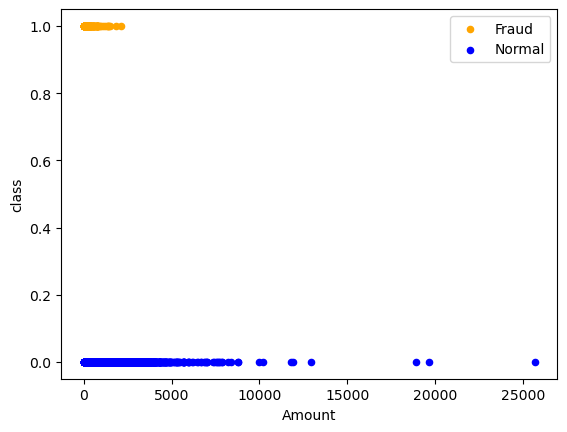

This feature looks important based on their distribution with respect to class.


In [18]:
ax = frauds.plot.scatter(x='Amount', y='class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='Amount', y='class', color='Blue', label='Normal', ax=ax)
plt.show()
print("This feature looks important based on their distribution with respect to class.")

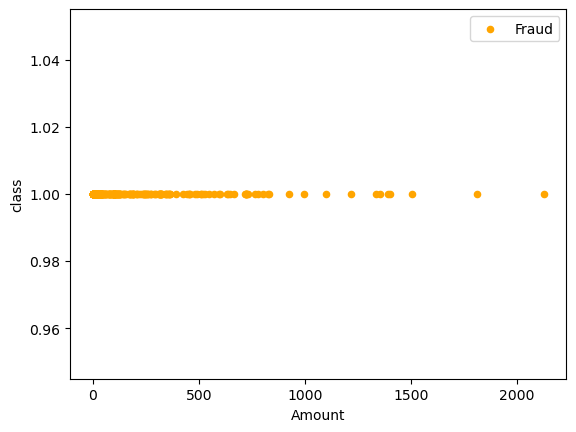

In [19]:
bx = frauds.plot.scatter(x='Amount', y='class', color='Orange', label='Fraud')
plt.show()

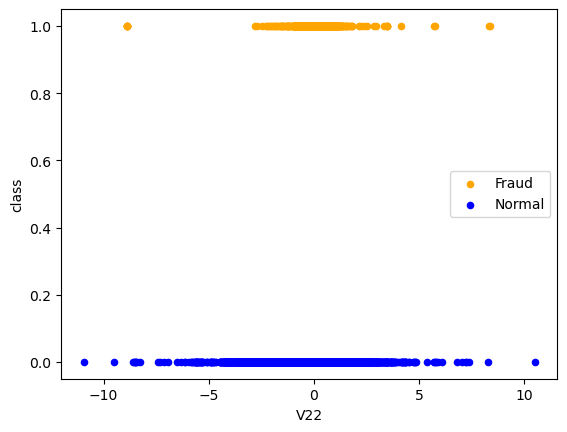

In [20]:
ax = frauds.plot.scatter(x='V22', y='class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='V22', y='class', color='Blue', label='Normal', ax=ax)
plt.show()

# Logistic Regression

In [19]:
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [21]:
X = df.iloc[:,:-1]
y = df['class']

print("X and y sizes, respectively:", len(X), len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)
print("Train and test sizes, respectively:", len(X_train), len(y_train), "|", len(X_test), len(y_test))
print("Total number of frauds:", len(y.loc[df['class'] == 1]), len(y.loc[df['class'] == 1])/len(y))
print("Number of frauds on y_test:", len(y_test.loc[df['class'] == 1]), len(y_test.loc[df['class'] == 1]) / len(y_test))
print("Number of frauds on y_train:", len(y_train.loc[df['class'] == 1]), len(y_train.loc[df['class'] == 1])/len(y_train))

X and y sizes, respectively: 284807 284807
Train and test sizes, respectively: 185124 185124 | 99683 99683
Total number of frauds: 492 0.001727485630620034
Number of frauds on y_test: 158 0.001585024527752977
Number of frauds on y_train: 334 0.0018041961063935525


In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)

In [31]:
logistic = linear_model.LogisticRegression(C=1e5, max_iter=10000)
logistic.fit(X_train, y_train)
print("Score: ", logistic.score(X_test, y_test))

Score:  0.9992275513377407


In [32]:
y_predicted = np.array(logistic.predict(X_test))
y_right = np.array(y_test)

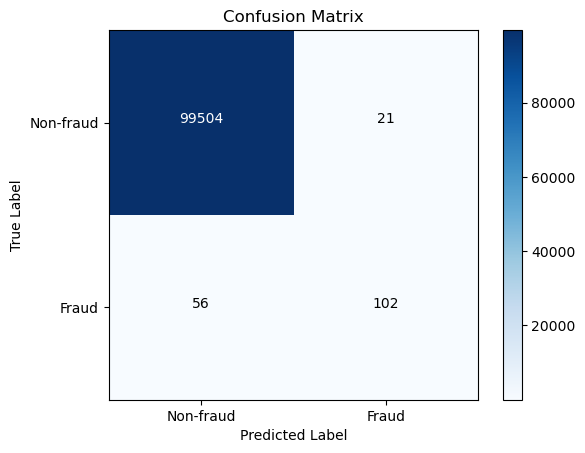

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have 'y_right' and 'y_predicted' NumPy arrays
confusion = confusion_matrix(y_right, y_predicted)

# Plot the confusion matrix
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Set the labels for the confusion matrix
tick_marks = np.arange(2)  # Adjust based on the number of classes
plt.xticks(tick_marks, ['Non-fraud', 'Fraud'])
plt.yticks(tick_marks, ['Non-fraud', 'Fraud'])

# Add labels to each cell
thresh = confusion.max() / 2.0
for i in range(confusion.shape[0]):
    for j in range(confusion.shape[1]):
        plt.text(j, i, format(confusion[i, j], 'd'), horizontalalignment="center", color="white" if confusion[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_right, y_predicted)

# Calculate precision
precision = precision_score(y_right, y_predicted)

# Calculate recall
recall = recall_score(y_right, y_predicted)

# Calculate F1-score
f1 = f1_score(y_right, y_predicted)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.9992275513377407
Precision: 0.8292682926829268
Recall: 0.6455696202531646
F1-Score: 0.7259786476868327


In [35]:
df.isna()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [1]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [21]:
from imblearn.over_sampling import RandomOverSampler
X = df.iloc[:,:-1]
y = df['class']
oversampler = RandomOverSampler(sampling_strategy='minority')
X_resampled, y_resampled = oversampler.fit_resample(X, y)

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\Rithika Patil\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)